# 🛒 Market Basket Analysis on Online Retail Data

## 📌 Project Overview
This project performs Market Basket Analysis (MBA) on a publicly available Online Retail dataset to uncover hidden relationships between products frequently purchased together. Insights can help optimize:

- 🚀 Sales strategies  
- 😊 Customer experience  
- 📦 Inventory management  

## 📂 Dataset
**Online Retail** dataset from UCI Machine Learning Repository  

- **Time Period:** 01/12/2010 - 09/12/2011  
- **Key Features:**  
  - InvoiceNo ➡️ Transaction ID  
  - StockCode ➡️ Product ID  
  - Description ➡️ Product name  
  - Quantity ➡️ Units purchased  
  - InvoiceDate ➡️ Transaction timestamp  
  - UnitPrice ➡️ Price per unit  
  - CustomerID ➡️ Customer identifier  
  - Country ➡️ Customer location  

## 🧪 Methodology
1. **Data Loading & Exploration**  
   - Use `pandas` for initial analysis and data quality checks  

2. **Data Cleaning**  
   - 🧹 Handle missing values (`CustomerID`, `Description`)  
   - 🚫 Filter canceled orders (InvoiceNo starting with `'C'`)  
   - ➖ Remove negative quantities/invalid prices  

3. **Data Transformation**  
   - 🔄 Create transaction format (One-hot encoded matrix)  

4. **Frequent Itemset Generation**  
   - ⚙️ Apply Apriori Algorithm (minimum support threshold)  

5. **Association Rule Generation**  
   - 📜 Rules format: `{Antecedent} -> {Consequent}`  

6. **Rule Evaluation**  
   - 📊 Metrics: **Support, Confidence, Lift**  

7. **Visualization (Optional)**  
   - 📈 Use Matplotlib/Seaborn for insights presentation  

## 🎯 Project Goals
- Implement MBA on real-world e-commerce data  
- Identify strong product associations 🔗  
- Reveal commonly co-purchased items 🛍️  
- Demonstrate retail application of association rules  
- Deliver a reproducible analysis workflow 🔄  

## 💼 Potential Applications
- **Personalized Recommendations**  
  - "Customers who bought X also bought Y" suggestions  
- **Strategic Product Placement**  
  - Virtual store layout optimization  
- **Targeted Marketing**  
  - Promotions for likely co-purchases 🎯  
- **Inventory Optimization**  
  - Complementary product demand forecasting 📈  

## 🛠️ Technologies & Libraries
- Python (Primary language)  
- `pandas` (Data manipulation)  
- `NumPy` (Numerical operations)  
- `mlxtend` (Apriori implementation)  
- `Matplotlib` / `Seaborn` (Visualization) 📊  


In [80]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori, association_rules


In [81]:
#Load Dataset
df = pd.read_excel(r'C:\Users\Sam_Ke\Downloads\Online Retail.xlsx')

In [82]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [84]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [85]:
#Check Missing Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [86]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 5268


In [87]:
# Sample unique countries and products
print(df['Country'].nunique(), "countries:", df['Country'].unique()[:5])

38 countries: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany']


In [88]:
print("Sample products:", df['Description'].unique()[:5])

Sample products: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.']


✅ Now let’s clean your data step by step.
🔹 Step 1: Drop rows with missing CustomerID

In [90]:
df = df.dropna(subset=['CustomerID'])

🔹 Step 2: Drop rows with missing Description

In [92]:
df = df.dropna(subset=['Description'])

🔹 Step 3: Remove returns and cancellations

In [94]:
df['InvoiceNo'].value_counts()

InvoiceNo
576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: count, Length: 22190, dtype: int64

In [95]:
df['InvoiceNo'].str.startswith('C').value_counts()

InvoiceNo
True    8905
Name: count, dtype: int64

In [96]:
df['InvoiceNo'].str.startswith('C').sum()

8905

In [97]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df = df[~df['InvoiceNo'].str.startswith('C')]
df = df[df['Quantity'] > 0]

🔹 Step 4: Clean text columns
Remove trailing/leading spaces.

In [99]:
df['Description'] = df['Description'].str.strip()

🔹 Step 5: Optional — Convert CustomerID to string for later grouping

In [101]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [102]:
#Cleaned Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  object        
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


In [103]:
 #Exploratory Data Analysis (EDA) ---
# Let's explore the cleaned dataset to understand its characteristics.

# 2.1 Sales Distribution by Country
# Calculate the total sales for each country.
# First, calculate the total price for each line item.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by Country and sum the TotalPrice
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

print("\n--- Countries by Sales ---")
print(country_sales)


--- Countries by Sales ---
Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2

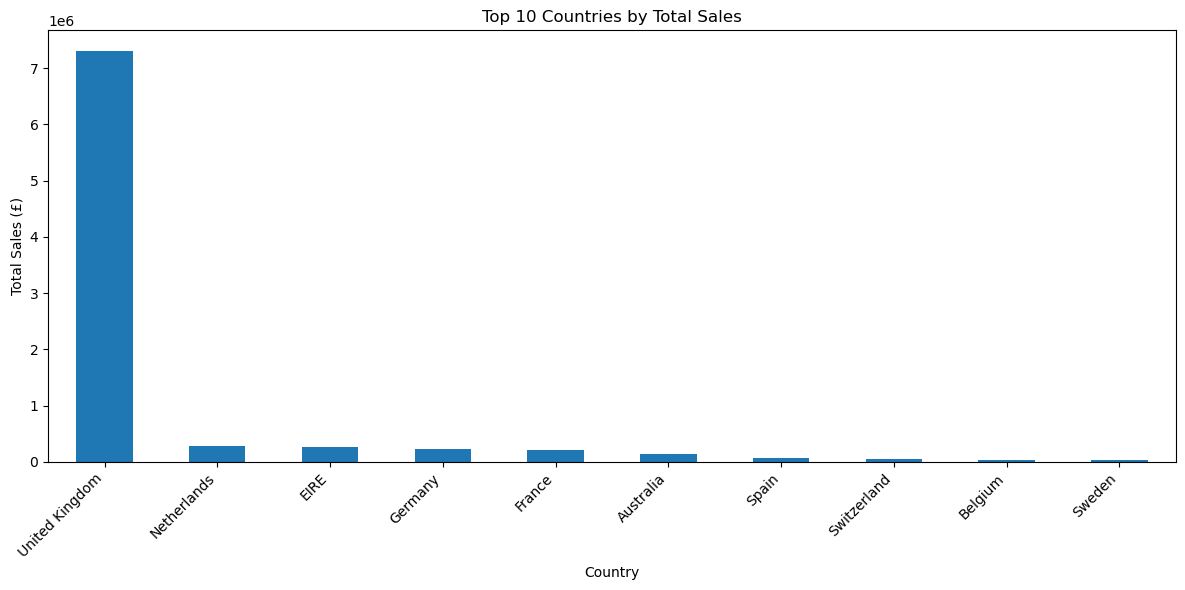

In [104]:
# visualize Top 10 Countries by Total Sales.

plt.figure(figsize=(12, 6))
country_sales.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [105]:
# 2.2 Top Selling Products
# Let's find the top items by quantity sold and by total revenue.

# Quantity Sold
top_quantity_items = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(20)
print("\n--- Top 20 Items by Quantity Sold ---")
print(top_quantity_items)

# Top 10 Items by Total Revenue
top_revenue_items = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(20)
print("\n--- Top 20 Items by Total Revenue ---")
print(top_revenue_items)


--- Top 20 Items by Quantity Sold ---
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25345
PACK OF 60 PINK PAISLEY CAKE CASES    24264
BROCADE RING PURSE                    22963
VICTORIAN GLASS HANGING T-LIGHT       22433
ASSORTED COLOURS SILK FAN             21876
RED  HARMONICA IN BOX                 20975
JUMBO BAG PINK POLKADOT               20165
SMALL POPCORN HOLDER                  18252
LUNCH BAG RED RETROSPOT               17697
60 TEATIME FAIRY CAKE CASES           17689
Name: Quantity, dtype: int64

--- Top 20 Items by Total Revenue ---
D

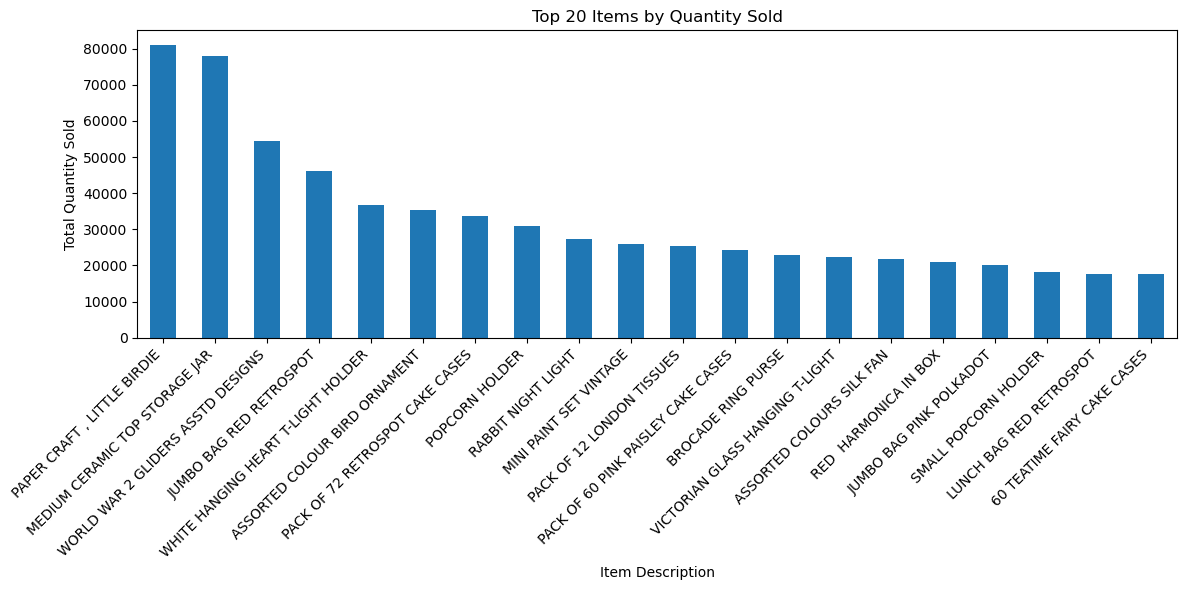

In [106]:
# You could visualize Top 20 Items by Quantity Sold
plt.figure(figsize=(12, 6))
top_quantity_items.plot(kind='bar')
plt.title('Top 20 Items by Quantity Sold')
plt.xlabel('Item Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

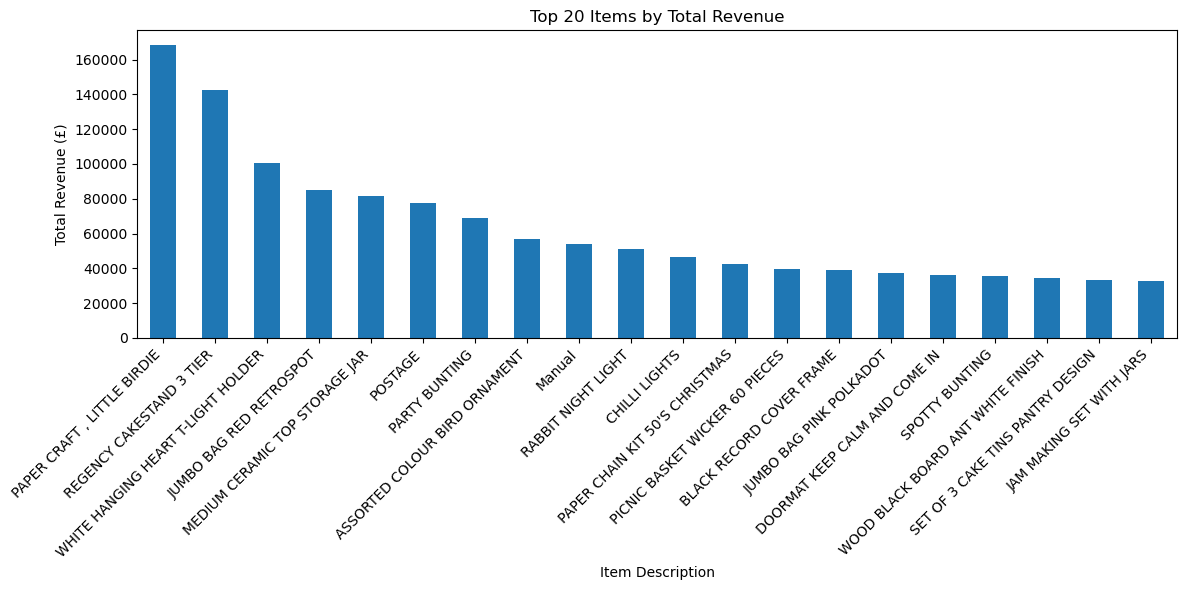

In [107]:
#Top 20 Items by Total Revenue
plt.figure(figsize=(12, 6))
top_revenue_items.plot(kind='bar')
plt.title('Top 20 Items by Total Revenue')
plt.xlabel('Item Description')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [108]:
# 2.3 Temporal Analysis
# Let's look at sales trends over time.

# Extract date components
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek # Monday=0, Sunday=6
df['Hour'] = df['InvoiceDate'].dt.hour

In [109]:
# Sales by Month
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
print("\n--- Total Sales by Month ---")
print(monthly_sales)



--- Total Sales by Month ---
Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalPrice, dtype: float64


In [110]:
# Sales by Day of Week
dayofweek_sales = df.groupby('DayOfWeek')['TotalPrice'].sum()
print("\n--- Total Sales by Day of Week (0=Monday, 6=Sunday) ---")
print(dayofweek_sales)


--- Total Sales by Day of Week (0=Monday, 6=Sunday) ---
DayOfWeek
0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: TotalPrice, dtype: float64


In [111]:
# Sales by Hour of Day
hour_sales = df.groupby('Hour')['TotalPrice'].sum()
print("\n--- Total Sales by Hour of Day ---")
print(hour_sales)


--- Total Sales by Hour of Day ---
Hour
6           4.250
7       31059.210
8      282115.630
9      842605.171
10    1261192.571
11    1104558.750
12    1378571.480
13    1173264.750
14     995629.371
15     966191.750
16     468885.800
17     234413.521
18     104954.430
19      49028.460
20      18932.760
Name: TotalPrice, dtype: float64


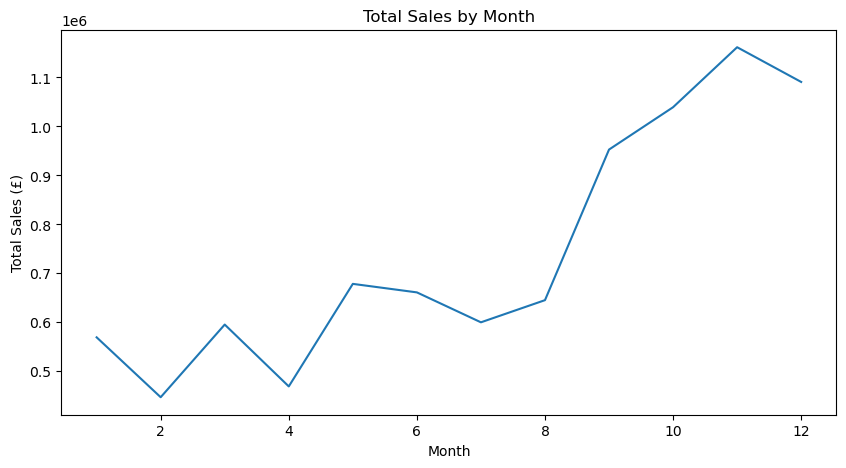

In [112]:
#visualize Total Sales by Month
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='line')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.show()

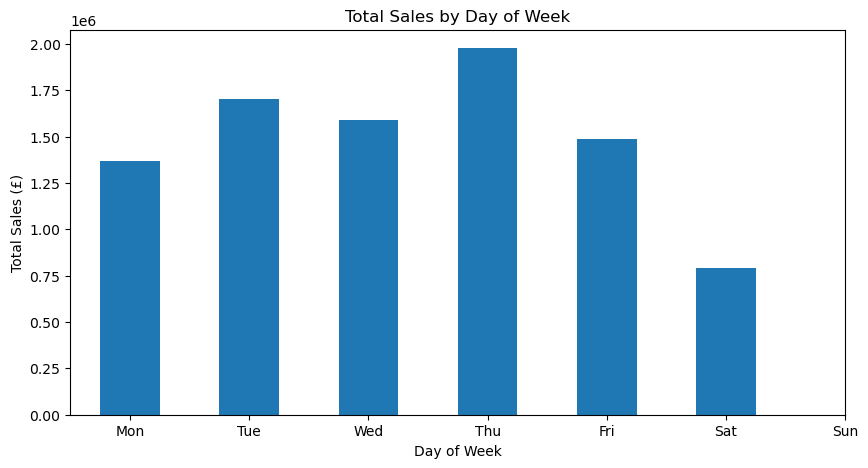

In [113]:
# Visualize Total Sales by Day of Week
plt.figure(figsize=(10, 5))
dayofweek_sales.plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (£)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

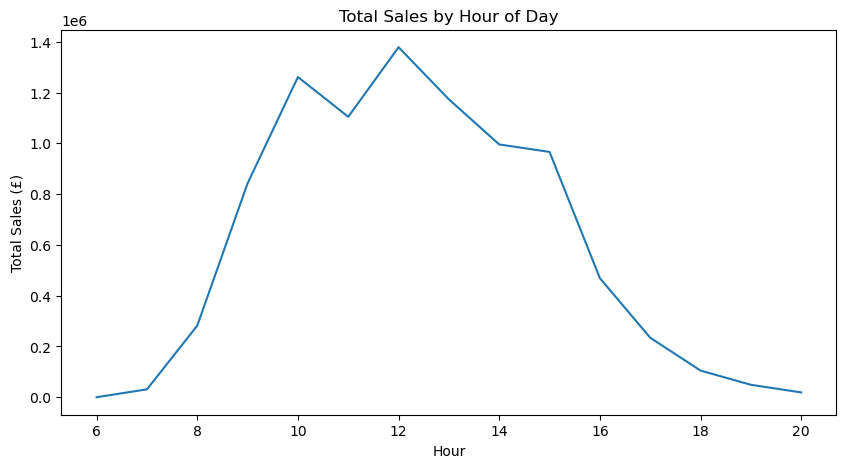

In [114]:
plt.figure(figsize=(10, 5))
hour_sales.plot(kind='line')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Sales (£)')
plt.show()

In [115]:
# 2.4 Customer Analysis
# How many transactions does each customer make?

# Count transactions per customer
transactions_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
print("\n--- Top 25 Customers by Number of Transactions ---")
print(transactions_per_customer.head(25))


--- Top 25 Customers by Number of Transactions ---
CustomerID
12748.0    210
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     74
16029.0     63
13408.0     62
18102.0     60
13798.0     57
14156.0     55
14527.0     55
16422.0     51
13694.0     50
15061.0     48
16013.0     47
15039.0     47
17450.0     46
17949.0     45
14298.0     44
15189.0     41
17811.0     39
17961.0     39
Name: InvoiceNo, dtype: int64


In [116]:
# Distribution of transactions per customer
print("\n--- Distribution of Transactions per Customer ---")
print(transactions_per_customer.describe())


--- Distribution of Transactions per Customer ---
count    4339.000000
mean        4.271952
std         7.705493
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
Name: InvoiceNo, dtype: float64


## 🧺 Step 3: Create the Transaction Matrix
We’ll:

Group by InvoiceNo (basket) and Description (item),

Sum up Quantity purchased,

Convert to a binary matrix (1 if item is in the basket, 0 otherwise).

In [118]:
# Group and pivot the data
basket = df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary (1 = item bought, 0 = not bought)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Preview
basket.head()

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_13040\3661842096.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have way many features, lets create separate baskets for each country to compare customer behavior geographically, which is especially valuable in retail and international marketing strategies.

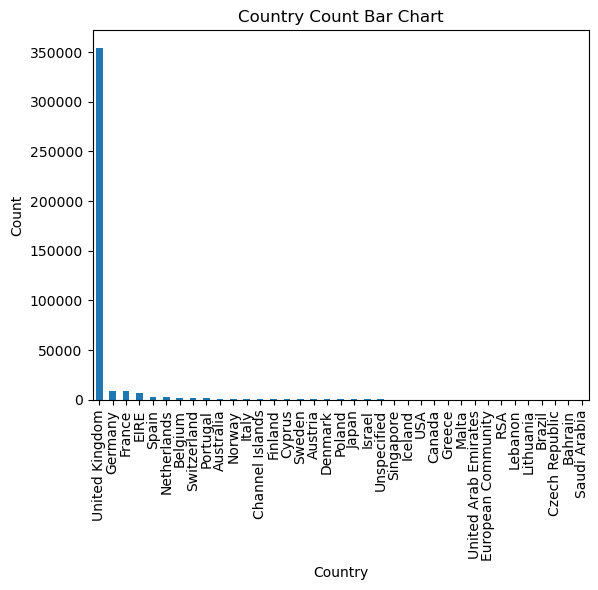

In [120]:
#Visiualize Country Column
df['Country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Count Bar Chart')
plt.show()

✅ Change of plans, Let’s generate basket matrices for just UK alone it has more than 354K items making it most significant:

Computation is fast

Rules are statistically meaningful

🧾 Step 1: Create UK basket matrix

In [123]:
basket_uk = df[df['Country'] == 'United Kingdom']

basket_uk = (basket_uk
             .groupby(['InvoiceNo', 'Description'])['Quantity']
             .sum().unstack().fillna(0))

basket_uk = basket_uk.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_13040\1231214060.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_uk = basket_uk.applymap(lambda x: 1 if x > 0 else 0)


📊 Step 2: Apply Apriori and Generate Rules

In [125]:
# Find frequent itemsets (set min_support to e.g., 0.02 = 2%)
frequent_itemsets = apriori(basket_uk, min_support=0.02, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# View top rules
rules.sort_values('lift', ascending=False).head(10)

C:\Users\Sam_Ke\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
71,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023004,0.036759,0.020482,0.890339,24.221015,1.0,0.019636,8.783841,0.981287,0.521407,0.886155,0.723764
74,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.036759,0.023004,0.020482,0.557190,24.221015,1.0,0.019636,2.206352,0.995300,0.521407,0.546763,0.723764
75,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.029611,0.028590,0.020482,0.691684,24.192941,1.0,0.019635,3.150691,0.987919,0.542994,0.682609,0.704035
70,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.028590,0.029611,0.020482,0.716387,24.192941,1.0,0.019635,3.421518,0.986881,0.542994,0.707732,0.704035
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.036759,0.029611,0.024266,0.660131,22.293137,1.0,0.023177,2.855182,0.991593,0.576320,0.649760,0.739802
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029611,0.036759,0.024266,0.819473,22.293137,1.0,0.023177,5.335706,0.984289,0.576320,0.812583,0.739802
73,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.040723,0.024266,0.020482,0.502950,20.726763,1.0,0.019494,1.963050,0.992157,0.460189,0.490589,0.673505
72,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.024266,0.040723,0.020482,0.844059,20.726763,1.0,0.019494,6.151553,0.975423,0.460189,0.837439,0.673505
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.040723,0.036759,0.028590,0.702065,19.099148,1.0,0.027093,3.233057,0.987871,0.584767,0.690695,0.739921
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.036759,0.040723,0.028590,0.777778,19.099148,1.0,0.027093,4.316746,0.983805,0.584767,0.768344,0.739921


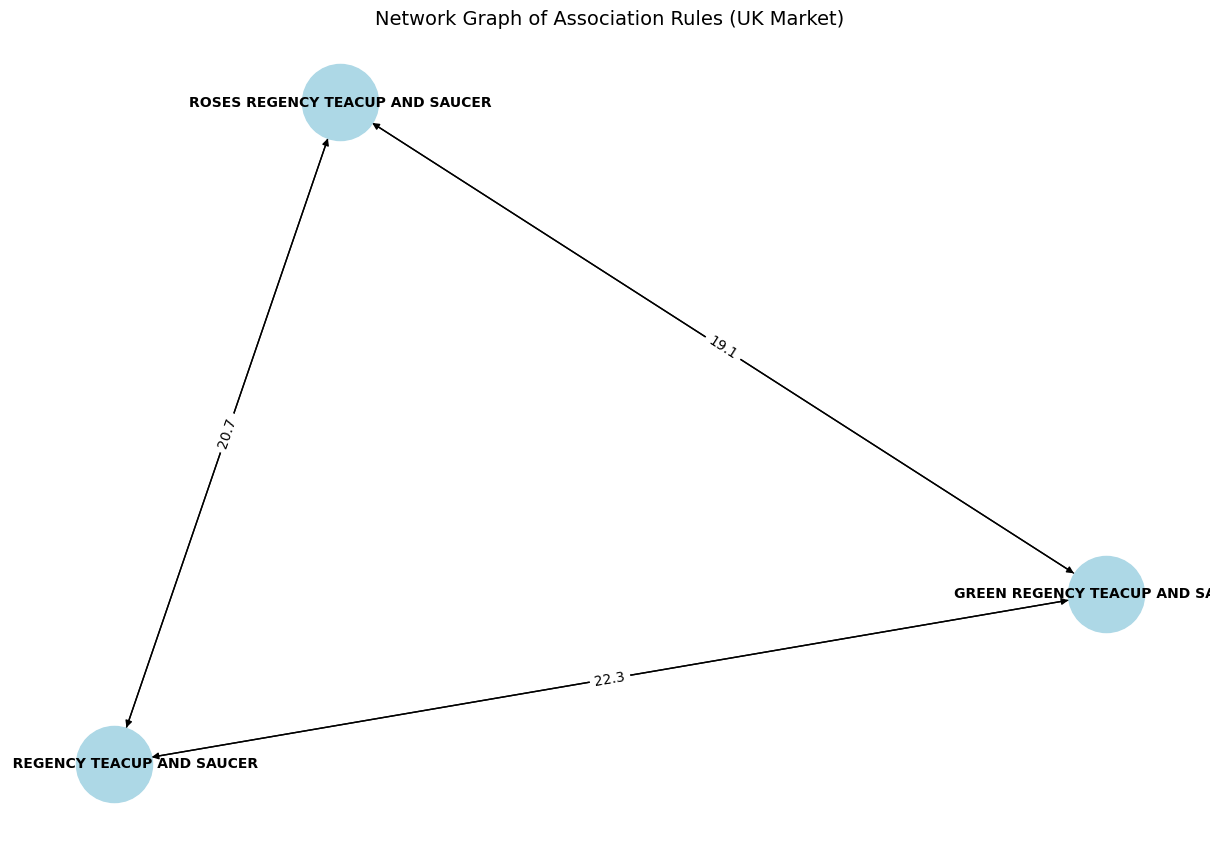

In [126]:


# Select top rules with high lift for clarity (customize as needed)
top_rules = rules[rules['lift'] > 10].nlargest(10, 'lift')

# Create a directed graph
G = nx.DiGraph()

# Add edges
for _, row in top_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Set layout
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.1f}" for k, v in labels.items()})

plt.title("Network Graph of Association Rules (UK Market)", fontsize=14)
plt.show()


In [127]:
def recommend_products(basket, rules_df, top_n=5):
    basket_set = set(basket)
    matched_rules = []

    for _, row in rules_df.iterrows():
        if row['antecedents'].issubset(basket_set):
            matched_rules.append((row['consequents'], row['confidence'], row['lift']))

    # Flatten and sort by confidence and lift
    recommendations = {}
    for cons, conf, lift in matched_rules:
        for item in cons:
            if item not in basket:
                if item not in recommendations or conf > recommendations[item][0]:
                    recommendations[item] = (conf, lift)

    # Sort by confidence, then lift
    sorted_recs = sorted(recommendations.items(), key=lambda x: (-x[1][0], -x[1][1]))
    return [item for item, _ in sorted_recs[:top_n]]

# Example basket
customer_basket = ['PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER']
recommendations = recommend_products(customer_basket, rules)
print("Recommended Products:", recommendations)


Recommended Products: ['GREEN REGENCY TEACUP AND SAUCER', 'REGENCY CAKESTAND 3 TIER']


📊 Code to Plot Lift vs. Confidence from Your Basket Analysis

C:\Users\Sam_Ke\AppData\Local\Temp\ipykernel_13040\2350990544.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


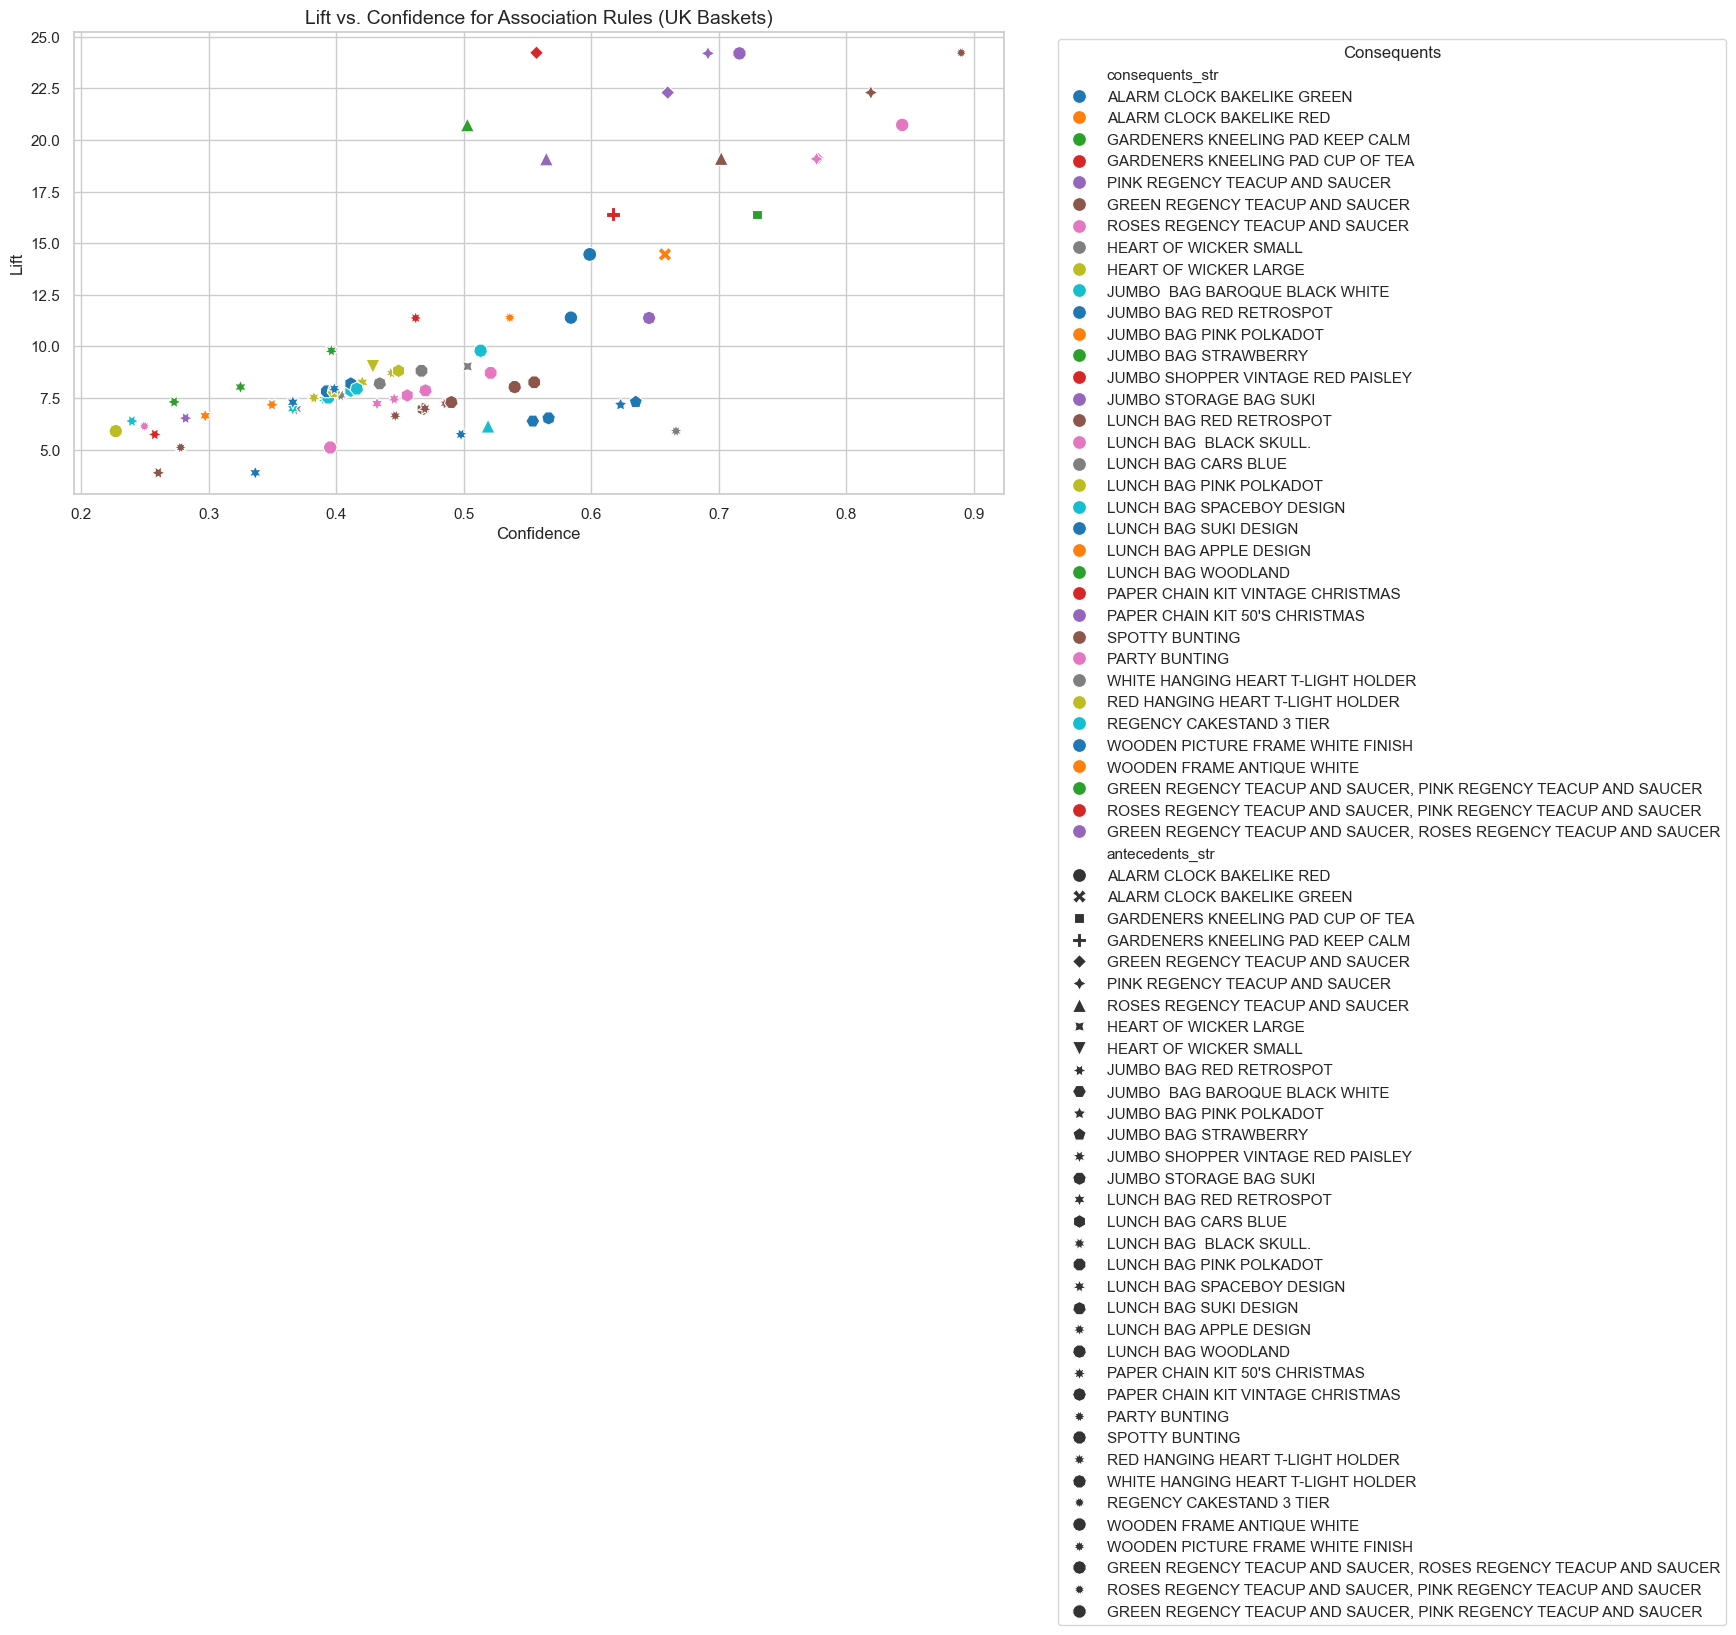

In [129]:
# Make sure antecedents and consequents are strings (for labeling)
rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x))).astype("unicode")
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x))).astype("unicode")

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=rules,
    x='confidence',
    y='lift',
    hue='consequents_str',
    style='antecedents_str',
    palette='tab10',
    s=100
)

plt.title('Lift vs. Confidence for Association Rules (UK Baskets)', fontsize=14)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Consequents')
plt.grid(True)
plt.tight_layout()
plt.show()

| Term           | Meaning                                                                                                    |
| -------------- | ---------------------------------------------------------------------------------------------------------- |
| **Antecedent** | The "if" part — the item(s) a customer bought                                                              |
| **Consequent** | The "then" part — the item(s) that are likely bought together                                              |
| **Confidence** | Probability that the consequent is bought **given** the antecedent                                         |
| **Lift**       | How much more likely the consequent is bought when the antecedent is bought, **compared to random chance** |
| **Support**    | Frequency of the itemset (how common the rule is in the dataset)                                           |


📈 How to Read the Lift vs. Confidence Plot
1. X-axis: Confidence
Further right = Stronger rule (more reliable).

A confidence of 0.80 means that 80% of the time when the antecedent was bought, the consequent was bought too.

2. Y-axis: Lift
Higher values = More interesting, non-random relationships.

A lift > 1 means the items co-occur more often than chance.

For example, a lift of 3.0 means customers who buy the antecedent are 3x more likely to buy the consequent than average.

3. Each Point = One Rule
The color or marker style usually reflects different consequents or antecedents.

Hover (in an interactive plot) or read the legend to see which rule each point represents.

In [132]:
# Select relevant columns and prepare for display
top_rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()

# Convert sets to strings for readability
top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Sort by lift to find strongest associations
top_rules = top_rules.sort_values(by='lift', ascending=False).reset_index(drop=True)

# Display top 10 rules
top_rules.head(10)

,antecedents,consequents,support,confidence,lift
0,"ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY ...",GREEN REGENCY TEACUP AND SAUCER,0.020482,0.890339,24.221015
1,GREEN REGENCY TEACUP AND SAUCER,"ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY ...",0.020482,0.557190,24.221015
2,PINK REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.020482,0.691684,24.192941
3,"GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY...",PINK REGENCY TEACUP AND SAUCER,0.020482,0.716387,24.192941
4,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.024266,0.660131,22.293137
5,PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.024266,0.819473,22.293137
6,ROSES REGENCY TEACUP AND SAUCER,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",0.020482,0.502950,20.726763
7,"GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY ...",ROSES REGENCY TEACUP AND SAUCER,0.020482,0.844059,20.726763
8,ROSES REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.028590,0.702065,19.099148
9,GREEN REGENCY TEACUP AND SAUCER,ROSES REGENCY TEACUP AND SAUCER,0.028590,0.777778,19.099148


🛍️ What This Table Represents:
These are product association rules — insights discovered using customers' past purchases from UK transactions. Each row tells us:

When customers buy certain product(s) (called antecedents),

They're likely to also buy another product or products (called consequents),

And it gives us statistics on how strong this relationship is.

📊 Breaking Down the Key Metrics:
Let’s explain the first row:

If a customer buys	Then they’re likely to also buy	Confidence	Lift	Support
PINK & ROSES TEACUPS	GREEN TEACUP	89%	24×	2%

Confidence (89%) means: 89% of people who bought the Pink & Roses Teacups also bought the Green Teacup.

Lift (24) means: This combination happens 24 times more often than we’d expect by chance — it's a very strong signal.

Support (2%) means: This pattern appeared in 2% of all UK transactions — not huge, but meaningful for a niche product.

💡 Key Takeaways for Business:
Tea sets sell in groups – Customers don't just buy one type. If they buy PINK REGENCY, they’re likely to get GREEN or ROSES too.

Bundling opportunity – These items could be packaged together (e.g., “Vintage Tea Party Set”).

Cross-promotion – If someone adds PINK TEACUP to cart online, suggest GREEN TEACUP at checkout.

Visual Merchandising – These products should be displayed together in-store and online.